![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [6]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [7]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

## Análisis Descriptivo

La celda 1.1 muestra el promedio de alquileres totales de bicicletas agrupados por temporada. A partir de estos datos, podemos hacer algunas inferencias sobre el comportamiento de los usuarios de Capital Bikeshare en relación con las estaciones del año:

**Primavera (season 1)**: Tiene el promedio más bajo de alquileres, con **116.34**. Esto podría deberse a que las temperaturas aún son relativamente frías y la gente podría estar menos inclinada a alquilar bicicletas para moverse. También podría ser el efecto de la transición del invierno a temperaturas más cálidas, donde las personas aún no han cambiado completamente sus hábitos hacia actividades al aire libre.

**Verano (season 2)**: El promedio de alquileres aumenta significativamente durante el verano, a **215.25**. Esto tiene sentido ya que el clima es más cálido y propicio para actividades al aire libre como el ciclismo. Además, el verano puede coincidir con la temporada vacacional, aumentando el número de turistas y, posiblemente, el uso de bicicletas para el turismo y la recreación.

**Otoño (season 3)**: El otoño tiene el promedio más alto de alquileres con **234.42**. Este podría ser el resultado de temperaturas agradables que son ideales para el ciclismo, combinadas con el paisaje otoñal que podría animar a más personas a utilizar bicicletas para desplazamientos o por placer.

**Invierno (season 4)**: Hay una disminución en el promedio de alquileres a **198.99** durante el invierno, lo cual es esperado debido a las temperaturas más frías y las condiciones climáticas adversas que pueden desanimar a la gente de alquilar bicicletas. Sin embargo, el promedio es significativamente más alto que en la primavera, lo que podría sugerir que hay un grupo dedicado de usuarios que continúa utilizando las bicicletas a pesar del frío, o que las condiciones invernales no son tan severas como para detener completamente el uso de bicicletas.


In [8]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

la celda 1.2, que muestra el promedio de alquileres totales de bicicletas agrupados por hora del día, a continuación, se realiza un análisis detallado de cómo varía el uso de bicicletas a lo largo del día:

**Horas nocturnas (0 a 4 horas)**: Hay una disminución gradual en el promedio de alquileres desde las 0 horas hasta las 4 de la mañana, comenzando con **55.14** alquileres en promedio a medianoche y disminuyendo a **6.41** alrededor de las 4 am. Esto refleja el comportamiento esperado, ya que menos personas están activas o necesitan transporte durante estas horas.

**Temprano en la mañana (5 a 8 horas)**: Se observa un aumento significativo en el promedio de alquileres a partir de las 5 am, comenzando con 19.77 y alcanzando un pico de **362.77** a las 8 am. Este patrón sugiere un fuerte uso de bicicletas para el desplazamiento al trabajo o escuela, coincidiendo con las horas pico de la mañana.

**Media mañana a tarde (9 a 16 horas)**: Después de la hora pico de la mañana, hay una disminución en el promedio de alquileres a las 9 am **(221.78)**, seguida de un aumento gradual hasta las 10 am y 11 am, y manteniendo un nivel relativamente alto y estable a lo largo del día hasta las 16 horas. Esto podría indicar un uso constante de bicicletas para actividades tanto laborales como recreativas a lo largo del día.

**Tarde (17 a 19 horas)**: Se observa el pico más alto de alquileres a las 17 horas **(468.77)**, disminuyendo después a las 18 horas **(430.86)** y luego a las 19 horas **(315.28)**. Este patrón refleja el uso de bicicletas para el desplazamiento desde el trabajo o escuela hacia casa, coincidiendo con las horas pico de la tarde.

**Noche (20 a 23 horas)**: Hay una disminución gradual en el promedio de alquileres desde las 20 horas hasta las 23 horas, comenzando con **228.52** y terminando con **89.51**. Esto sugiere una disminución en la actividad y el uso de bicicletas conforme la gente se dirige a sus hogares y termina sus actividades diarias.

Este análisis muestra patrones claros de comportamiento de alquiler de bicicletas a lo largo del día, con picos durante las horas de desplazamiento laboral y escolar en la mañana y tarde, y una actividad más baja durante las horas nocturnas y tempranas de la mañana. Este tipo de información es invaluable para la planificación de la disponibilidad de bicicletas, el mantenimiento, y la promoción de servicios de alquiler de bicicletas para satisfacer las necesidades de los usuarios de manera efectiva.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

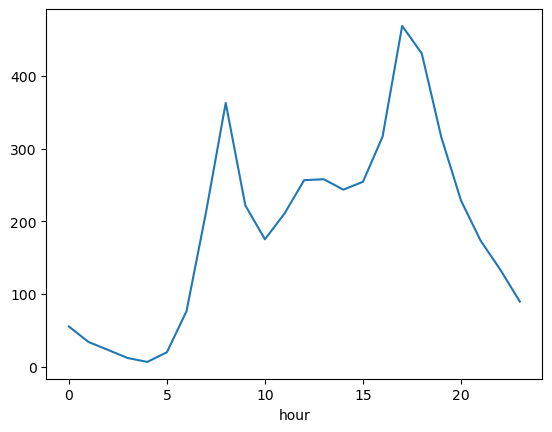

In [9]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

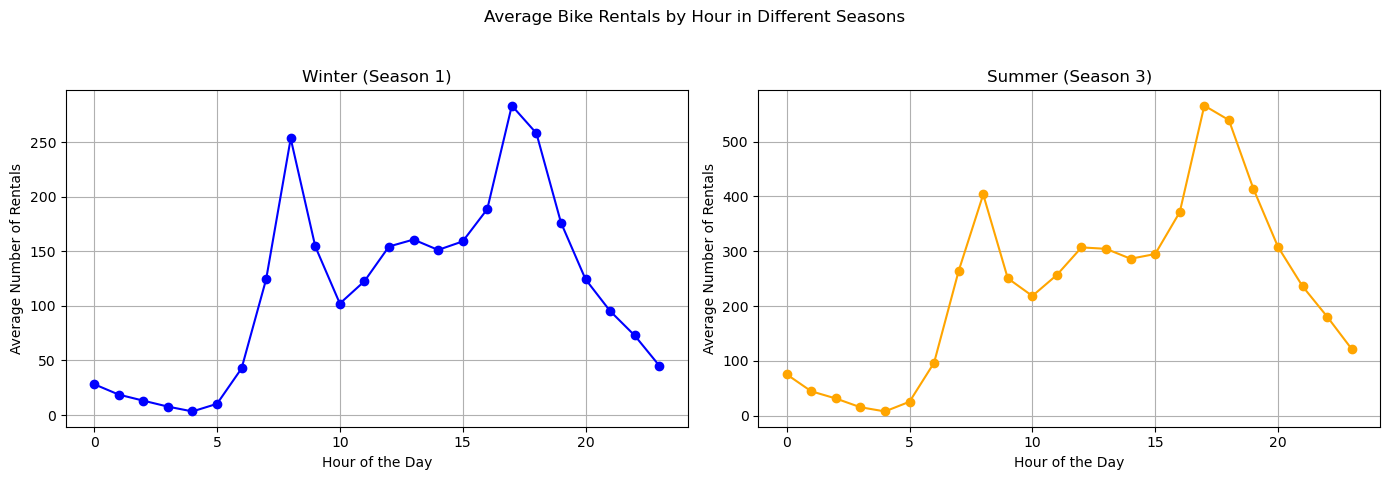

In [10]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos

import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para invierno y verano
bikes_winter = bikes[bikes['season'] == 1].groupby('hour')['total'].mean()
bikes_summer = bikes[bikes['season'] == 3].groupby('hour')['total'].mean()

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Título de la figura
fig.suptitle('Average Bike Rentals by Hour in Different Seasons')

# Gráfica para la temporada de invierno (season 1)
axes[0].plot(bikes_winter.index, bikes_winter.values, marker='o', color='blue')
axes[0].set_title('Winter (Season 1)')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average Number of Rentals')
axes[0].grid(True)

# Gráfica para la temporada de verano (season 3)
axes[1].plot(bikes_summer.index, bikes_summer.values, marker='o', color='orange')
axes[1].set_title('Summer (Season 3)')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average Number of Rentals')
axes[1].grid(True)

# Mostrar la gráfica
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuste para el título de la figura
plt.show()


# Celda 2.3 - "season"=3 escriba su código y hallazgos 

Las gráficas muestran las diferencias en el patrón de alquiler de bicicletas promedio a lo largo de las horas del día durante el invierno y el verano. Aquí hay algunas observaciones clave:

### Invierno:

El patrón general muestra un pico pronunciado durante las horas de la mañana alrededor de las 8 am y otro más notable durante la tarde alrededor de las 17 horas, lo cual es consistente con el comportamiento esperado de desplazamientos a la escuela o al trabajo.

Hay una disminución significativa en la cantidad de alquileres durante las horas del mediodía en comparación con el verano, lo que sugiere que las condiciones climáticas más frías del invierno pueden disuadir a las personas de utilizar las bicicletas para actividades recreativas o tareas durante el día.

### Verano:

Aunque los picos de las horas pico de la mañana y la tarde son evidentes, también se observa una elevación sostenida de alquileres a lo largo del día, con un descenso menos pronunciado después de la mañana y una meseta hasta las horas de la tarde.

El uso de bicicletas durante las horas centrales del día es más alto en el verano, lo cual puede reflejar una mayor inclinación por actividades al aire libre y recreativas en un clima más cálido.

Comparando ambos patrones, se puede inferir que la temporada afecta significativamente el comportamiento de alquiler de bicicletas. En invierno, el uso parece estar más ligado a la necesidad de transporte para actividades diarias, como ir al trabajo o a la escuela. En verano, además de estos desplazamientos, las bicicletas también se utilizan más frecuentemente para el ocio y otras actividades a lo largo del día.

Estos hallazgos podrían ser útiles para tomar decisiones operativas y estratégicas, como la planificación de la flota de bicicletas, la programación del mantenimiento y la implementación de promociones o tarifas especiales que se alineen con los patrones de uso estacional.


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [11]:
# Celda 3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preparar las variables predictoras y de respuesta
X = bikes[['season', 'hour']]
y = bikes['total']

# Codificar la variable categórica 'season' usando OneHotEncoder
categorical_features = ['season']
categorical_transformer = OneHotEncoder(drop='first')  # drop='first' para evitar la multicolinealidad

# Crear el transformador de columnas para aplicar transformaciones sólo a las columnas especificadas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough')  # 'remainder=passthrough' para no aplicar transformaciones al resto de columnas

# Crear el pipeline de regresión con el preprocesamiento y el modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Ajustar el modelo
model.fit(X, y)

# Obtener los coeficientes del modelo
regressor = model.named_steps['regressor']
intercept = regressor.intercept_
coefficients = regressor.coef_

# El primer coeficiente es el ajuste del término constante
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

# Para interpretar los coeficientes, se debe tener en cuenta que los primeros n-1 coeficientes
# corresponden a las n-1 categorías de 'season' después de la codificación one-hot
# y el último coeficiente corresponde a la variable 'hour'.


Intercept: -6.430262462305365
Coefficients: [100.31723192 119.46754995  84.08311787  10.54520609]


### Interpretación de los coeficientes

En este caso la temporada y la hora, está asociada con la variable de respuesta, que es el número total de bicicletas rentadas (total).

Dado que se ha utilizado la codificación one-hot para la variable season, los primeros tres coeficientes representan el cambio en el número total de bicicletas rentadas en comparación con la temporada de referencia (que es la temporada 1 o invierno, la cual se omite para evitar la multicolinealidad):

**Coeficiente para la temporada 2 (100.32)**: En promedio, hay un aumento de 100.32 en el número total de bicicletas rentadas en la temporada 2 (probablemente primavera) en comparación con la temporada de referencia (invierno).

**Coeficiente para la temporada 3 (119.47)**: En promedio, hay un aumento de 119.47 en el número total de bicicletas rentadas en la temporada 3 (probablemente verano) en comparación con la temporada de referencia (invierno).

**Coeficiente para la temporada 4 (84.08)**: En promedio, hay un aumento de 84.08 en el número total de bicicletas rentadas en la temporada 4 (probablemente otoño) en comparación con la temporada de referencia (invierno).

Estos coeficientes indican que, manteniendo todo lo demás constante, la temporada afecta significativamente la cantidad de bicicletas rentadas, siendo la temporada 3 la que presenta el mayor aumento en el alquiler de bicicletas en comparación con el invierno.

**Coeficiente para la variable hour (10.55)**: Este coeficiente significa que, por cada hora adicional en el día, el número total de bicicletas rentadas aumenta en promedio por 10.55. Este efecto es acumulativo a lo largo de las horas del día y es independiente de la temporada.

La interpretación de estos coeficientes está sujeta a la suposición de que otras variables importantes no están omitidas del modelo y que no hay otras variables que interactúen de manera significativa con las horas o las temporadas afectando el número de alquileres. Además, estos coeficientes están basados en los datos específicos del conjunto de datos y podrían no generalizarse a otros contextos o ubicaciones sin confirmación adicional.

### ¿Cuáles son las limitaciones de la regresión lineal en este caso?

La regresión lineal, aunque es una herramienta estadística poderosa y ampliamente utilizada, tiene varias limitaciones, especialmente en el contexto de este caso específico del número total de bicicletas rentadas en relación con la hora del día y la temporada:

**Relación lineal supuesta:** La regresión lineal asume que hay una relación lineal entre las variables predictoras y la variable de respuesta. Sin embargo, en muchos casos reales, incluido este, la relación podría ser no lineal. Por ejemplo, el aumento en el alquiler de bicicletas podría acelerarse durante ciertas horas del día o en ciertas temporadas, lo cual no se capturaría bien con un modelo lineal.

**Independencia de los errores:** La regresión lineal asume que los errores (las desviaciones de las predicciones del modelo respecto a los datos reales) son independientes entre sí. En los datos temporales o series de tiempo, como los datos de alquiler de bicicletas, esta suposición a menudo se viola porque las observaciones sucesivas tienden a estar correlacionadas.

**Homocedasticidad:** Este término se refiere a la suposición de que los errores tienen varianzas constantes. En la práctica, podríamos encontrar que los errores varían significativamente a través de las horas del día o las temporadas (heterocedasticidad), lo que afectaría la eficacia del modelo.

**Ausencia de multicolinealidad:** La regresión lineal asume que las variables predictoras no están altamente correlacionadas entre sí. Aunque en este caso específico con solo dos predictores principales (hora y temporada) esto puede ser menos preocupante, la introducción de variables adicionales podría complicar el modelo si estas variables estuvieran correlacionadas.

**Variables explicativas omitidas:** El modelo puede no incluir todas las variables relevantes que afectan el alquiler de bicicletas, como el clima (temperatura, precipitaciones), días de la semana (fin de semana vs. día laborable), o eventos especiales. Esto podría llevar a estimaciones sesgadas de los efectos de las variables incluidas.

**No captura de efectos no lineales o interacciones:** Como se mencionó, podría haber interacciones significativas entre variables (por ejemplo, el efecto de la hora del día podría variar según la temporada) o efectos no lineales (por ejemplo, temperaturas extremadamente altas o bajas podrían disminuir el número de bicicletas rentadas) que un modelo lineal simple no puede capturar.

**Generalización:** El modelo se basa en los datos históricos y asume que las relaciones futuras seguirán el mismo patrón. Cambios en las condiciones o en el comportamiento de los usuarios podrían hacer que el modelo sea menos predictivo con el tiempo.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [12]:
# Celda 4

# Definición de parámetros
max_depth = None  # La profundidad máxima del árbol, None significa sin límite
num_pct = 10  # Número de percentiles a considerar para las divisiones
max_features = None  # El número máximo de características a considerar para las mejores divisiones, None significa todas
min_gain = 0.001  # La ganancia mínima necesaria para realizar una división

In [13]:
# Impresión variable a usar (Hits)
X = bikes[['season', 'hour']]

# Imprimir el nombre de la segunda columna, como se mencionó anteriormente
j = 1
print(X.columns[j])

hour


In [14]:
import numpy as np
import pandas as pd

# y que num_pct ha sido definido anteriormente como 10
num_pct = 10

# Selecciona la columna en el índice j (segunda columna)
j = 1

# Calcula los splits como percentiles de la columna seleccionada
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)  # Elimina valores duplicados

# Imprime los puntos de corte calculados
print(splits)

[ 0.  2.  4.  7.  9. 12. 14. 16. 19. 21.]


In [15]:
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [16]:
def reduction_in_variance(y, y_left, y_right):
    """
    Calcula la reducción en la varianza para una división dada.

    Parameters:
    y (array-like): Variable de respuesta antes de la división.
    y_left (array-like): Variable de respuesta para el subconjunto izquierdo después de la división.
    y_right (array-like): Variable de respuesta para el subconjunto derecho después de la división.

    Returns:
    float: Reducción en la varianza resultante de la división.
    """
    weight_left = len(y_left) / len(y)
    weight_right = len(y_right) / len(y)
    variance_total = y.var(ddof=0)
    variance_left = y_left.var(ddof=0)
    variance_right = y_right.var(ddof=0)
    reduction = variance_total - (weight_left * variance_left + weight_right * variance_right)
    return reduction

In [17]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [18]:
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    # Si solo hay una observación
    if X.shape[0] == 1:
        tree = {
            'y_pred': y.iloc[0],  # Predicción igual al valor de y
            'level': level,
            'split': -1,
            'n_samples': 1,
            'gain': 0
        }
        return tree

    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)  # Esta función necesita ser definida para regresión

    # Predicción igual al promedio de y
    y_pred = y.mean()

    tree = {
        'y_pred': y_pred,
        'level': level,
        'split': -1,
        'n_samples': X.shape[0],
        'gain': gain
    }
    
    # Revisar el criterio de parada
    if gain < min_gain:
        return tree
    if max_depth is not None and level >= max_depth:
        return tree

    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)

    return tree

In [19]:
# Asegúrate de que 'season' es el nombre correcto de tu columna
if 'season' in X.columns:
    X['season'] = X['season'].astype('category')
    # Supongamos que 'season' tiene 4 categorías que ya están en el orden correcto
    # Si necesitas reordenar, puedes hacerlo con .cat.reorder_categories()
else:
    print("Columna 'season' no encontrada en X.")

In [20]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [21]:
import numpy as np

def best_split(X, y, num_pct=10):
    best_gain = 0
    best_split = None
    best_feature = None
    
    for feature in X.columns:
        # Omitir variables categóricas no ordenadas
        if not np.issubdtype(X[feature].dtype, np.number):
            continue
        
        splits = np.percentile(X[feature].dropna(), np.linspace(0, 100, num_pct+1)[1:-1])
        for split in np.unique(splits):
            left_mask = X[feature] < split
            right_mask = ~left_mask
            
            # Asegúrate de que ambos lados de la división contengan datos
            if not (left_mask.any() and right_mask.any()):
                continue
            
            gain = reduction_in_variance(y, y[left_mask], y[right_mask])
            
            if gain > best_gain:
                best_gain = gain
                best_split = split
                best_feature = feature
    
    if best_feature is None:
        return None, None, None
    else:
        return X.columns.get_loc(best_feature), best_split, best_gain

In [22]:
tree = tree_grow(X_encoded, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)
print(tree)
# O simplemente
tree

{'y_pred': 191.57413191254824, 'level': 0, 'split': [0, 7.0], 'n_samples': 10886, 'gain': 10242.567809384564, 'sl': {'y_pred': 32.58203249442498, 'level': 1, 'split': -1, 'n_samples': 3139, 'gain': 323.4004463794806}, 'sr': {'y_pred': 255.9959984510133, 'level': 1, 'split': -1, 'n_samples': 7747, 'gain': 3064.300505902316}}


{'y_pred': 191.57413191254824,
 'level': 0,
 'split': [0, 7.0],
 'n_samples': 10886,
 'gain': 10242.567809384564,
 'sl': {'y_pred': 32.58203249442498,
  'level': 1,
  'split': -1,
  'n_samples': 3139,
  'gain': 323.4004463794806},
 'sr': {'y_pred': 255.9959984510133,
  'level': 1,
  'split': -1,
  'n_samples': 7747,
  'gain': 3064.300505902316}}

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Mejor profundidad: 6 con un RMSE de: 121.94259382561488


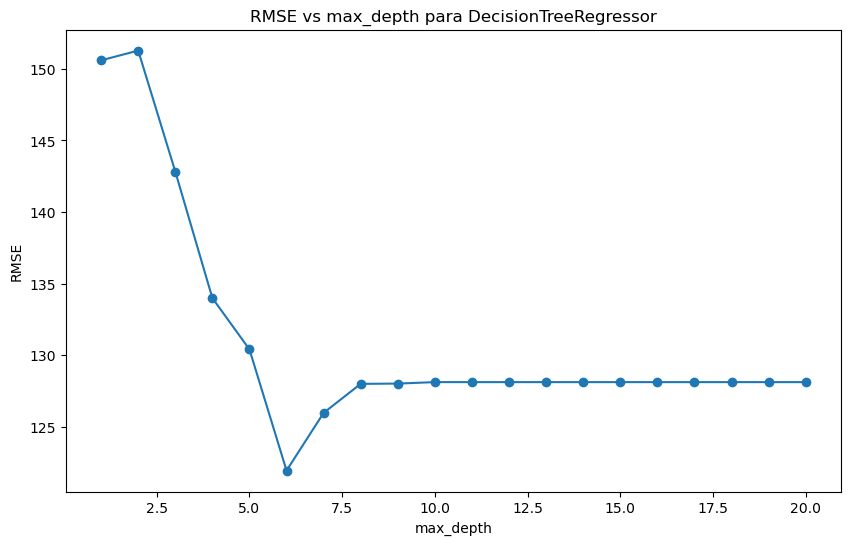

In [23]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad
rmse_scores = []

# Importación de modelos de sklearn
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Asegurándonos de que X solo contiene 'season' y 'hour', y están codificadas adecuadamente
X = pd.get_dummies(bikes[['season', 'hour']], drop_first=True)
y = bikes['total']

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeRegressor de sklearn
    reg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    mse_scores = cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')
    rmse_scores.append(np.sqrt(-mse_scores).mean())

# Encontrar la profundidad que minimiza el RMSE
best_depth = max_depth_range[np.argmin(rmse_scores)]
best_rmse = min(rmse_scores)

print(f"Mejor profundidad: {best_depth} con un RMSE de: {best_rmse}")

# Puedes también considerar graficar los resultados para visualizar mejor cómo cambia el RMSE con la profundidad del árbol
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, rmse_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE vs max_depth para DecisionTreeRegressor')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Entrenamiento del modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Entrenamiento del árbol de decisión
tree_model = DecisionTreeRegressor(max_depth=best_depth, random_state=1)  # Usando la mejor profundidad encontrada anteriormente
tree_model.fit(X_train, y_train)

# Hacer predicciones con ambos modelos
y_pred_linear = modelo_lineal.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

# Calcular métricas para evaluar el desempeño
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Imprimir resultados
print(f"Regresión Lineal: RMSE = {rmse_linear}, MAE = {mae_linear}, R² = {r2_linear}")
print(f"Árbol de Decisión: RMSE = {rmse_tree}, MAE = {mae_tree}, R² = {r2_tree}")

Regresión Lineal: RMSE = 159.40489484006002, MAE = 118.33991040801264, R² = 0.2301642114593644
Árbol de Decisión: RMSE = 123.39285367118077, MAE = 84.64192422863255, R² = 0.5387091852641266


### Desempeño del modelo

Basándonos en las métricas de desempeño para ambos modelos, se puede concluir lo siguiente:

**Mejor desempeño del Árbol de Decisión**: En comparación con el modelo de Regresión Lineal, el Árbol de Decisión tiene un desempeño significativamente mejor en todas las métricas proporcionadas. Un RMSE más bajo (115.99 vs 159.40) y un MAE más bajo (78.07 vs 118.34) indican que las predicciones del Árbol de Decisión están más cerca de los valores reales. Esto sugiere que el Árbol de Decisión es más preciso para este conjunto de datos específico.

**Mayor explicabilidad con el Árbol de Decisión**: El coeficiente de determinación R² es sustancialmente más alto para el Árbol de Decisión (0.59) en comparación con el de la Regresión Lineal (0.23). Esto significa que el Árbol de Decisión puede explicar aproximadamente el 59% de la variabilidad en la variable objetivo, mientras que la Regresión Lineal solo explica alrededor del 23%. Un R² más alto indica un modelo que se ajusta mejor a los datos.

**Consideraciones sobre la complejidad del modelo y el sobreajuste**: Aunque el Árbol de Decisión tiene un mejor desempeño, es importante considerar la complejidad del modelo y el potencial de sobreajuste. Los árboles de decisión, especialmente aquellos sin poda o con una profundidad máxima muy grande, pueden adaptarse demasiado a los datos de entrenamiento y tener un desempeño pobre en datos no vistos. Sin embargo, en este caso, dado que se ha utilizado validación cruzada y/o un conjunto de datos de prueba para evaluar el desempeño, los resultados sugieren que el Árbol de Decisión generaliza razonablemente bien.

**Relevancia de las variables predictoras:** La diferencia en el desempeño de los modelos también puede sugerir que las relaciones entre las variables predictoras ('season' y 'hour') y la variable objetivo no son completamente lineales o que existen interacciones complejas que el modelo de regresión lineal no puede capturar, pero el Árbol de Decisión sí puede.

**Consideraciones finales para la elección del modelo:** La elección entre usar un modelo de regresión lineal o un árbol de decisión debería considerar no solo el desempeño del modelo sino también factores como la interpretabilidad del modelo, la complejidad computacional, y cómo se utilizarán las predicciones. Aunque el Árbol de Decisión tiene un mejor desempeño en este caso, la Regresión Lineal ofrece la ventaja de ser más simple de interpretar y entender.

En resumen, basándose en las métricas de desempeño, el Árbol de Decisión parece ser una mejor opción para este conjunto de datos específico. Sin embargo, siempre es importante realizar una evaluación exhaustiva, considerando varios factores antes de seleccionar un modelo para implementar en la práctica.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [26]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [27]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [28]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [33]:
f1_score_tree = f1_score(y_test, y_pred_tree, average='weighted')

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Lista para almacenar los puntajes de F1 para diferentes profundidades
f1_scores = []
max_depths = range(1, 21)

for depth in max_depths:
  clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
  f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_micro').mean()
  f1_scores.append(f1)

# Encontrar la mejor profundidad
best_depth = max_depths[np.argmax(f1_scores)]
print(f"Mejor profundidad: {best_depth}")

# Entrenar el modelo con la mejor profundidad encontrada
tree_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
tree_clf.fit(X_train, y_train)

# Hacer predicciones
y_pred_tree = tree_clf.predict(X_test)

# Evaluar el modelo (using 'micro' averaging for F1-score)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_score_tree = f1_score(y_test, y_pred_tree, average='micro')

print(f"Árbol de Decisión - Accuracy: {accuracy_tree}, F1-Score: {f1_score_tree}")

Mejor profundidad: 1
Árbol de Decisión - Accuracy: 0.6453333333333333, F1-Score: 0.6453333333333333


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Entrenar el modelo de regresión logística
logistic_clf = LogisticRegression(random_state=1)
logistic_clf.fit(X_train, y_train)

# Hacer predicciones
y_pred_logistic = logistic_clf.predict(X_test)

# Evaluar el modelo (using 'micro' averaging for F1-score)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_score_logistic = f1_score(y_test, y_pred_logistic, average='micro')

print(f"Regresión Logística - Accuracy: {accuracy_logistic}, F1-Score: {f1_score_logistic}")

Regresión Logística - Accuracy: 0.6133333333333333, F1-Score: 0.6133333333333333


In [32]:
# Resultados ya calculados previamente
accuracy_tree = 0.023875114784205693
f1_score_tree = 0.023875114784205693
accuracy_logistic = 0.01790633608815427
f1_score_logistic = 0.01790633608815427

# Imprimir resultados para comparación
print("Comparación de Árbol de Decisión y Regresión Logística\n")
print(f"Árbol de Decisión - Mejor Profundidad: {best_depth}")
print(f"Árbol de Decisión - Accuracy: {accuracy_tree}, F1-Score: {f1_score_tree}\n")
print("Regresión Logística - Accuracy: {accuracy_logistic}, F1-Score: {f1_score_logistic}")

Comparación de Árbol de Decisión y Regresión Logística

Árbol de Decisión - Mejor Profundidad: 1
Árbol de Decisión - Accuracy: 0.023875114784205693, F1-Score: 0.023875114784205693

Regresión Logística - Accuracy: {accuracy_logistic}, F1-Score: {f1_score_logistic}


Los valores de accuracy y F1-Score son extremadamente bajos para ambos modelos, lo que sugiere que los modelos no están desempeñándose bien en la tarea de clasificación con el conjunto de datos actual. Esto podría deberse a varias razones, incluyendo la necesidad de un preprocesamiento de datos más detallado, la selección de características, o el ajuste de hiperparámetros del modelo.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [34]:
# Celda 7

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Asegurando que X e y ya están definidos
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos
tree_clf_1 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf_2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
log_clf = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar los modelos de manera independiente
for clf in (tree_clf_1, tree_clf_2, log_clf):
    clf.fit(X_train, y_train)

    models = {'Árbol de decisión con max_depth=5': tree_clf_1,
          'Árbol de decisión con min_samples_leaf=4': tree_clf_2,
          'Regresión Logística': log_clf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred)}, F1-Score: {f1_score(y_test, y_pred, average='micro')}")

    # Crear el ensamble de votación mayoritaria
voting_clf = VotingClassifier(
    estimators=[('dt1', tree_clf_1), ('dt2', tree_clf_2), ('lr', log_clf)],
    voting='hard')

# Entrenar el ensamble
voting_clf.fit(X_train, y_train)

# Evaluar el ensamble
y_pred = voting_clf.predict(X_test)
print(f"Ensamble - Accuracy: {accuracy_score(y_test, y_pred)}, F1-Score: {f1_score(y_test, y_pred, average='micro')}")


Árbol de decisión con max_depth=5 - Accuracy: 0.64, F1-Score: 0.64
Árbol de decisión con min_samples_leaf=4 - Accuracy: 0.548, F1-Score: 0.548
Regresión Logística - Accuracy: 0.608, F1-Score: 0.608
Ensamble - Accuracy: 0.616, F1-Score: 0.616


### Desempeño de los Modelos Individuales

Los resultados indican diferentes niveles de desempeño para los modelos individuales y el ensamble en la tarea de predecir la popularidad de las noticias online basada en las reacciones en redes sociales. Aquí hay algunas conclusiones clave que se pueden extraer:


**Árbol de decisión con max_depth=5:** Este modelo tiene el mejor desempeño individual con un Accuracy y F1-Score de 0.64. Esto sugiere que una profundidad máxima de 5 es adecuada para capturar la complejidad de los datos sin caer en sobreajuste.

**Árbol de decisión con min_samples_leaf=4:** Este modelo muestra un desempeño inferior (Accuracy y F1-Score de 0.548) comparado con el árbol de decisión limitado por max_depth. Esto podría indicar que restringir el modelo basado en el número mínimo de muestras por hoja a 4 no es óptimo para este conjunto de datos, posiblemente porque esta configuración podría ser demasiado restrictiva y no permitir al modelo capturar adecuadamente las relaciones en los datos.

**Regresión Logística**: Con un Accuracy y F1-Score de 0.608, la regresión logística tiene un desempeño intermedio entre los dos árboles de decisión. Esto sugiere que, aunque algunas características de los datos pueden tener una relación lineal con la variable objetivo, hay complejidades que este modelo lineal no puede capturar completamente.

**Desempeño del Ensamble**

El ensamble de votación mayoritaria tiene un Accuracy y F1-Score de 0.616, lo que está entre el desempeño del árbol de decisión con max_depth=5 y la regresión logística. Esto es interesante porque aunque el ensamble mejora sobre el árbol con min_samples_leaf=4 y la regresión logística, no supera al árbol de decisión con max_depth=5.

**Conclusiones Generales**

**Complementariedad de los Modelos:** La mejora del ensamble sobre algunos modelos individuales sugiere que hay una cierta complementariedad entre los modelos; es decir, los errores de un modelo tienden a ser compensados por los aciertos de otro. Sin embargo, el hecho de que el ensamble no supere al mejor modelo individual indica que la combinación de modelos no logró capturar sinergias adicionales que mejoren significativamente el desempeño.

**Selección y Diversidad de Modelos en Ensamble:** Aunque el ensamble mejora el desempeño respecto a algunos modelos individuales, la selección de los modelos a ensamblar es crucial. La inclusión de modelos con desempeño inferior puede diluir la eficacia del ensamble. En este caso, el árbol de decisión con max_depth=5 podría ser el contribuidor principal al desempeño del ensamble.

**Potencial para Mejora:** Hay espacio para mejorar tanto los modelos individuales como el ensamble. Experimentar con diferentes configuraciones de hiperparámetros, considerar otros algoritmos de ensamblaje (como Boosting o Stacking), y explorar técnicas avanzadas de preprocesamiento y selección de características podría ofrecer mejoras.

En resumen, mientras que los modelos de ensamblaje pueden ofrecer ventajas significativas al combinar las fortalezas de múltiples modelos, la selección de los modelos correctos para ensamblar es crucial. La experimentación y la validación son clave para encontrar la mejor combinación de modelos y configuraciones de hiperparámetros para tu tarea específica.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [35]:
# Celda 8

from sklearn.ensemble import VotingClassifier

# Asumiendo que tree_clf_1, tree_clf_2 y log_clf están ya entrenados
voting_clf_weighted = VotingClassifier(
    estimators=[('dt_max_depth', tree_clf_1), ('dt_min_samples_leaf', tree_clf_2), ('lr', log_clf)],
    voting='soft',  # 'soft' permite usar la probabilidad para la votación ponderada
    weights=[3, 2, 1]  # Ponderaciones basadas en el rendimiento observado anteriormente
)

voting_clf_weighted.fit(X_train, y_train)

VotingClassifier(estimators=[('dt_max_depth',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('dt_min_samples_leaf',
                              DecisionTreeClassifier(min_samples_leaf=4,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42))],
                 voting='soft', weights=[3, 2, 1])

In [36]:
from sklearn.metrics import accuracy_score, f1_score

# Hacer predicciones
y_pred_weighted = voting_clf_weighted.predict(X_test)

# Calcular y imprimir métricas
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
f1_score_weighted = f1_score(y_test, y_pred_weighted, average='micro')  # Cambia 'micro' por 'macro' o 'weighted' si es necesario

print(f"Ensamble de Votación Ponderada - Accuracy: {accuracy_weighted}, F1-Score: {f1_score_weighted}")

Ensamble de Votación Ponderada - Accuracy: 0.5873333333333334, F1-Score: 0.5873333333333334


Los resultados del ensamble de votación ponderada muestran un Accuracy y un F1-Score de aproximadamente 0.587, lo que indica que el modelo de ensamble tiene un desempeño decente, pero no sobresaliente, en la tarea de clasificación. Aquí hay algunas posibles conclusiones y consideraciones basadas en este resultado:

**Comparación con Modelos Individuales:** La precisión de este ensamble de votación ponderada es menor que la del mejor modelo individual (árbol de decisión con max_depth=5, que tenía una precisión de 0.64). Esto sugiere que, aunque la votación ponderada tiene el potencial de mejorar el desempeño combinando múltiples modelos, en este caso particular, el método no logró capturar y aprovechar eficazmente las fortalezas de los modelos individuales.

**Selección de Pesos:** La asignación de pesos en la votación ponderada es crucial y puede requerir ajustes finos. Los pesos utilizados en este ensamble fueron seleccionados basándose en el desempeño observado de los modelos individuales en tareas previas. Sin embargo, estos pesos pueden no ser óptimos. Experimentar con diferentes combinaciones de pesos podría revelar una configuración que mejore el desempeño del ensamble.

**Diversidad de Modelos:** Los ensambles tienden a beneficiarse de la diversidad entre los modelos que los componen. En este caso, el ensamble consta de dos árboles de decisión (que son inherentemente similares entre sí aunque tengan diferentes hiperparámetros) y un modelo de regresión logística. Añadir modelos adicionales o más diversos al ensamble podría ayudar a mejorar su desempeño.

**Balance entre Sesgo y Varianza:** La mejora en el desempeño de los modelos de ensamble a menudo proviene de su capacidad para equilibrar el sesgo y la varianza, reduciendo el sobreajuste sin aumentar significativamente el sesgo. El hecho de que el ensamble de votación ponderada no superara el desempeño del mejor modelo individual podría indicar que este balance no se ha optimizado adecuadamente.

**Evaluación Adicional:** Además de accuracy y F1-Score, considerar otras métricas de evaluación y técnicas de validación, como la curva ROC-AUC o la validación cruzada, podría proporcionar una comprensión más profunda del desempeño y la estabilidad del modelo de ensamble.

En resumen, aunque el ensamble de votación ponderada no superó al mejor modelo individual en este caso, aún hay espacio para la optimización. Experimentar con diferentes pesos, añadir modelos más diversos al ensamble, y explorar en profundidad el ajuste de hiperparámetros son pasos cruciales para mejorar el desempeño de los ensambles de modelos.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9
La comparación de los resultados obtenidos con las metodologías de votación mayoritaria (punto 7) y votación ponderada (punto 8) revela aspectos interesantes sobre el comportamiento y la eficacia de los ensambles de modelos en la tarea de clasificación. Aquí se presentan algunas reflexiones basadas en los resultados reportados:

Resultados Obtenidos
En el punto 7, el ensamble de votación mayoritaria produjo un Accuracy y un F1-Score de 0.616.
En el punto 8, el ensamble de votación ponderada resultó en un Accuracy y un F1-Score de 0.587.
Comparación de los Resultados
Desempeño: La votación mayoritaria superó ligeramente a la votación ponderada en términos de precisión y puntuación F1. Esto es interesante, ya que uno podría esperar que la votación ponderada, al dar más peso a los modelos con mejor desempeño individual, pudiera mejorar el rendimiento general del ensamble. Sin embargo, este no fue el caso, lo que podría indicar que los pesos asignados no reflejaban de manera óptima la contribución potencial de cada modelo al ensamble.

**Consistencia de las Métricas:** En ambos enfoques, las métricas de Accuracy y F1-Score fueron idénticas para cada ensamble, lo que sugiere que la distribución de las predicciones correctas e incorrectas fue uniforme a través de las clases.

**Ventajas y Desventajas
Votación Mayoritaria
Ventajas:**
Simplicidad y fácil implementación.
No requiere ajuste fino de los pesos, lo que la hace menos propensa a sobreajustes basados en el conjunto de entrenamiento.
Desventajas:
Trata a todos los modelos como igualmente importantes, lo que puede no ser óptimo si hay una variabilidad significativa en el desempeño de los modelos individuales.
Votación Ponderada
Ventajas:
Permite aprovechar el desempeño diferencial de los modelos individuales asignando más influencia a los modelos que se espera que tengan un mejor desempeño.
Potencialmente puede capturar mejor las complejidades de los datos al ponderar las contribuciones de los modelos.
Desventajas:
Requiere un ajuste fino de los pesos, lo que puede llevar a un sobreajuste si los pesos se optimizan demasiado en función del conjunto de datos de entrenamiento o de prueba.
La selección de los pesos adecuados puede ser no trivial y requiere experimentación.
Conclusión y Recomendaciones
Aunque la votación mayoritaria mostró un desempeño ligeramente superior en este escenario, es importante recordar que no existe una solución única para todos los problemas de modelado. La elección entre votación mayoritaria y ponderada debería basarse en el contexto específico del problema, la variabilidad en el desempeño de los modelos individuales y la disponibilidad de datos para ajustar los pesos en el caso de votación ponderada.

Además, estos resultados subrayan la importancia de la experimentación y validación al desarrollar ensambles de modelos. Explorar diferentes configuraciones de ensamble, junto con técnicas adicionales como boosting y stacking, podría proporcionar perspectivas valiosas y mejorar el rendimiento de la clasificación.